# Nonlinear Regression Practice Problem

## Learning Objectives

After studying this notebook, attending class, asking questions, and reviewing your notes, you should be able to:
* Develop transformations for some nonlinear models and apply linear regression
* Perform residual analysis for linear and nonlinear regression (as diagnostic plots for both)
* Calculate standard errors (i.e., standard deviation) of the residuals
* Assemble the covariance matrix for linear regression using normal equations (i.e., feature matrix $\mathbf{X}$)
* Calculate nonlinear regression best fit using Python
* Assemble the covariance matrix for nonlinear regression

In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import math
import matplotlib.pyplot as plt

## Background
For this question, originally developed by [Prof. David T. Leighton](https://engineering.nd.edu/faculty/david-leighton/), you will use nonlinear regression to analyze the kinetics of an indicator in a strong base.

Phenolphthalein is a base indicator (it turns a pretty purple), but in the presence of a strong base, it will fade over time.  This is a reversible reaction: pseudo first order in the forward (fading) direction (it is actually second order, but there is so much $[OH^-]$ that it can be simplified as pseudo first order) and first order in the reverse direction. The rate expression is:

\begin{equation} 
\frac{d[P]}{dt} = -k_{1}[P][OH^-]+k_{2}[POH] ~,
\end{equation}

where $k_{1}' = k_{1}  \cdot [OH^-]$ is the pseudo first order rate. $[POH]$ is only produced from this reaction, thus we have the mass balance:

\begin{equation}
[POH] = [POH]\Big|_{t=0}+([P]_{0}-[P]) ~.
\end{equation}

With the initial conditions:

\begin{equation}
[P]\Big|_{t=0}=[P]_{0}\qquad; \qquad [POH]\Big|_{t=0}=0 ~.
\end{equation}

We can solve these equations to get the solution:

\begin{equation}
[P] = [P]_{0}\Big(\frac{k_{2}}{k_{1}'+k_{2}}+\frac{k_{1}'}{k_{1}'+k_{2}}e^{-(k_{1}'+k_{2})t}\Big) ~.
\end{equation}

We seek best fit values for parameters 
\begin{equation}
k=\begin{bmatrix}k_{1}' & k_{2} & k_{eq}\end{bmatrix}^T~,
\end{equation}

where $k_{eq} = k'_1 / k_2$. However, this problem is poorly scaled with respect to $k$. Instead, we will transform it to obtain:

\begin{equation} 
[P] = [P]_{eq}+([P]_{0}-[P]_{eq})e^{-\lambda t}
\end{equation}

where $\lambda=k_{1}'+k_{2}$. These two rate constants can be calculated from the ratio of the initial and equilibrium concentrations and the exponential decay rate.

Consider an experiment where students introduce a dilute amount of phenolphthalein into a 0.1M NaOH solution.  Using a colorimeter, students measure the following absorbances as a function of time:

| Time (min) | Absorbance |
|-|-|
| 0 | 1.1546 |
| 10 | 0.9456 |
| 20 | 0.8257 |
| 30 | 0.7442 |
| 40 | 0.6310 |
| 50 | 0.5536 |
| 60 | 0.4738 |
| 70 | 0.4507 |
| 80 | 0.3671 |
| 90 | 0.3826 |
| 100 | 0.3574 |
| 110 | 0.2926 |
| 120 | 0.3105 |
		
Because the solution is so dilute, the absorbance obeys Beer's Law; thus the absorbance is proportional to the concentration.

Thought Experiment: How would we go about regressing the model for $k$ despite it being poorly scaled? One option would be to scale the model by $[P]_{0}$ and the experimental data by the original adsorbance, thus removing a parameter from the regression problem. We would then fit $k_{1}'$ and $k_{2}$ then compute $k_{eq}$. To reiteration, the nonlinear regression we will pursue below for $\theta$ is preferred.


## Transform Model Parameters

On paper, show the following transformations are valid:

\begin{equation}
k_{2}=\frac{[P]_{eq} \times \lambda}{[P]_{0}}
\end{equation}

\begin{equation}
k_{1}'=\lambda-k_{2}=\lambda - \frac{[P]_{eq} \times \lambda}{[P]_{0}} = \lambda \left(1 - \frac{[P]_{eq}}{[P]_{0}} \right)
\end{equation}

\begin{equation}
k_{eq}=\frac{k_{1}'}{k_{2}}=\frac{[P]_{0}}{[P]_{eq}} - 1
\end{equation}

Hint: Compare the two models when $t \rightarrow 0$ and $t \rightarrow \infty$.

Then on paper, determine the units for $k_{1}'$, $k_{2}$, $k_{eq}$, $[P]_{0}$, $[P]_{eq}$, and $\lambda$.

## Perform Nonlinear Regression

Compute the best fit values for parameters $\theta = [~ [P]_0, [P]_{eq}, \lambda ~]^T$ using the experimental data. Call your solution vector `theta_sol` and store your answers in variables `P0`, `Peq`, and `l`.

In [2]:
# time and concentration data
data = np.array([[0, 1.1546],
                [10, 0.9456],
                [20, 0.8257],
                [30, 0.7442],
                [40, 0.631],
                [50, 0.5536],
                [60, 0.4738],
                [70, 0.4507],
                [80, 0.3671],
                [90, 0.3826],
                [100, 0.3754],
                [110, 0.2926],
                [120, 0.3105]])

t = data[:,0] # the times, min
p = data[:,1] # the concentrations, M
n = len(t) # number of data points

In [3]:
# define functions to evaluation model and residuals.

def model_func(x, t):
    '''
    Function to define model being fitted
    Arguments:
        x: parameter vector
        t: time vector
    Returns:
        model: matrix of equations
    '''
    # Add your solution here
    
    return model

In [4]:
def regression_func(x, t, p):
    '''
    Function to define regression function for least-squares fitting
    Arguments:
        x: parameter vector
        t: time vector
        p: concentrations vector
    Returns:
        r: residuals
    '''
    # Add your solution here
    
    return r

In [5]:
theta_guess = np.array([1, 1, 1])

# Store the regression solution in `regress_sln`
# Add your solution here

theta_sol = regress_sln.x

P0 = theta_sol[0]
Peq = theta_sol[1]
l = theta_sol[2]

print("P0 =",P0,"add units")
print("Peq=",Peq,"add units")
print("lambda =",l,"add units")

P0 = 1.142863315604312 add units
Peq= 0.2285933787614881 add units
lambda = 0.020845030823048914 add units


## Plot Residuals and Fitted Model

A critical assumption in regression analysis is that the model errors are independent and identically distributed. Do the following to check this assumption:
1. Calculate the residuals. Save the answer in the variable `res`.
2. Plot the residuals vs. time
3. Plot concentration prediction (from your model) vs. time. On the same graph, plot the experimental data.
4. Write at least two sentences to interpret the plots.


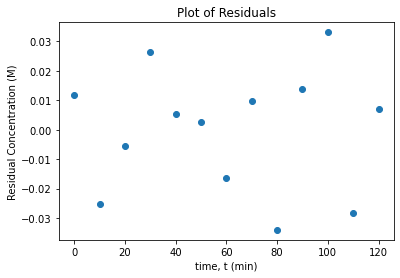

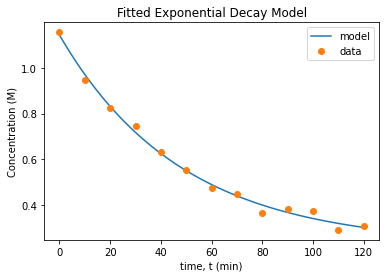

In [6]:
# Add your solution here

## Covariance Matrix

We can quickly estimate the covariance matrix:

\begin{equation}
	\Sigma_x \approx {\hat{\sigma}}^2_r \left( J^T J \right)^{-1}
\end{equation}

where $\hat{\sigma}^2_r$ is the variance of the residuals and $J$ is the Jacobian of the residuals with respect to the model parameters $x$.

Do the following on paper:
1. Assemble the gradient vectors $\nabla_{x} k_{1}'$, $\nabla_{x} k_{2}$, and $\nabla_{x} k_{eq}$.
2. Write the formula to calculate the covariance matrix $\Sigma_{k}$. Hint: look at your notes for multivariate error propagation.
3. Write the equations to calculate $\sigma_{K_{eq}}$ and its 95% confidence interval. Leave your answers in symbolic form.

Finally, implement the calculations (above steps) in Python. You will need to start by calculating $\Sigma_x$. Report the standard deviation of the equilibrium constant and the 95% confidence interval with the units and a reasonable number of significant digits.  

In [7]:
# Calculate the variance in the random error from the residuals
# Store in sigre
# Add your solution here
print('Variance of residuals = {0:0.4f} M^2\n'.format(sigre))


Variance of residuals = 0.0005 M^2



In [8]:
# Calcuate Keq
Keq = theta_sol[0]/theta_sol[1] - 1

In [9]:
# Compute the gradient vectors
# Store in gradf

# Add your solution here

print("\nJacobian of k =\n",gradf)


Jacobian of k =
 [[ 3.64819130e-03 -1.82393035e-02  7.99981874e-01]
 [-3.64819130e-03  1.82393035e-02  2.00018126e-01]
 [ 4.37457990e+00 -2.18709173e+01  0.00000000e+00]]


In [10]:
# Assemble the covariance matrix of theta
# Store in cov_theta
# Add your solution here
print("Covariance matrix of theta =\n",cov_theta)

Covariance matrix of theta =
 [[3.68684558e-04 2.24826273e-04 2.02814256e-05]
 [2.24826273e-04 7.98877420e-04 4.56687958e-05]
 [2.02814256e-05 4.56687958e-05 3.04396713e-06]]


In [11]:
# Compute the covariance matrix of k
# Store in cov_k

# Add your solution here

print("\nCovariance matrix of k =\n",cov_k)


Covariance matrix of k =
 [[ 9.74466936e-07  7.01675089e-07 -4.39373174e-04]
 [ 7.01675089e-07  6.66150016e-07 -4.70722566e-04]
 [-4.39373174e-04 -4.70722566e-04  3.46167155e-01]]


In [12]:
# Calculate the 95% confidence interval for Keq

# Add your solution here



Standard deviation of keq = 0.5884
t =  [-2.22813885  2.22813885]

95% confidence interval for Keq: [2.6886, 5.3105]


## Final Thoughts

* Residuals look much better with nonlinear regression
* Covariance matrix is much more reasonable
* Nonlinear regression is not that expensive or difficult, especially with Python and modern optimization algorithms